<a href="https://colab.research.google.com/github/ifekolade/Yahoo-Finance-Project-/blob/main/Copy_of_Ifeoluwapo_Kolade_Yahoo_Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To begin, I will retrieve data on NVIDIA stock from the onset of the pandemic until November 2025. I will also perform standard data cleaning tasks.

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import seaborn as sns

In [ ]:
ticker = 'NVDA'
import datetime
start_date = datetime.date(2020, 3, 13)
end_date = datetime.date(2025, 11, 30)
data=yf.download(ticker, start=start_date, end=end_date)


/tmp/ipython-input-135066919.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [ ]:
type(data)
data.head(20)
data.shape

(1437, 5)

In [ ]:
data.dropna()
data.drop_duplicates()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-03-13,5.997809,6.002292,5.469104,5.740305,634836000
2020-03-16,4.891088,5.630728,4.831319,5.289796,726972000
2020-03-17,5.410829,5.500234,4.756609,5.003404,833632000
2020-03-18,5.050970,5.228284,4.499602,4.983232,874268000
2020-03-19,5.303744,5.397382,4.816129,5.029554,765512000
...,...,...,...,...,...
2025-11-21,178.870041,184.549717,172.920360,181.229910,346926200
2025-11-24,182.539841,183.489785,176.470171,179.480013,256618300


In [ ]:
type(data)
data.head(20)

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-03-13,5.997809,6.002292,5.469104,5.740305,634836000
2020-03-16,4.891088,5.630728,4.831319,5.289796,726972000
2020-03-17,5.410829,5.500234,4.756609,5.003404,833632000
2020-03-18,5.050970,5.228284,4.499602,4.983232,874268000
2020-03-19,5.303744,5.397382,4.816129,5.029554,765512000
2020-03-20,5.123940,5.735823,5.108499,5.453913,804636000
2020-03-23,5.296770,5.391155,4.943884,5.122942,643876000
2020-03-24,6.205505,6.292171,5.679290,5.702949,1101644000


In [ ]:
data.shape


(1437, 5)

**Visualization of NVIDIA's stock price over time**

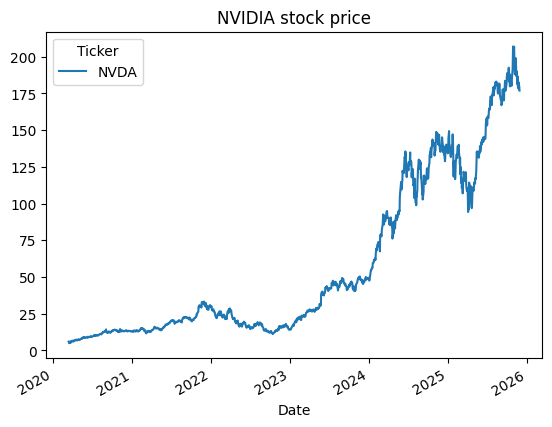

In [ ]:
data['Close']. plot (title= 'NVIDIA stock price')
plt.show()

# Statistical Summary





In [ ]:
print(data.describe())

Price         Close         High          Low         Open        Volume
Ticker         NVDA         NVDA         NVDA         NVDA          NVDA
count   1437.000000  1437.000000  1437.000000  1437.000000  1.437000e+03
mean      57.409179    58.401725    56.311048    57.418581  4.105193e+08
std       55.136932    56.001300    54.204698    55.206380  1.907324e+08
min        4.891088     5.228284     4.499602     4.983232  9.788400e+07
25%       15.287259    15.494041    15.014657    15.268717  2.586160e+08
50%       27.014549    27.445189    26.446770    26.990571  3.889710e+08
75%      106.950745   109.353196   103.385758   105.364905  5.218240e+08
max      207.028473   212.178195   205.548551   208.068415  1.543911e+09


simple moving averages

In [ ]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Signal'] = np.where(data['MA10'] > data['MA50'], 1, 0)
data['Position'] = data['Signal'].diff()

In [ ]:
data['Position'].unique()

array([nan,  0.,  1., -1.])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1437 entries, 2020-03-13 to 2025-11-28
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1437 non-null   float64
 1   (High, NVDA)    1437 non-null   float64
 2   (Low, NVDA)     1437 non-null   float64
 3   (Open, NVDA)    1437 non-null   float64
 4   (Volume, NVDA)  1437 non-null   int64  
 5   (MA10, )        1428 non-null   float64
 6   (MA50, )        1388 non-null   float64
 7   (Signal, )      1437 non-null   int64  
 8   (Position, )    1436 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 112.3 KB


/tmp/ipython-input-1196978388.py:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data[data['Signal']==1].index, data['Close'][data['Signal']==1], '^', color = 'g', label='Buy Signal')


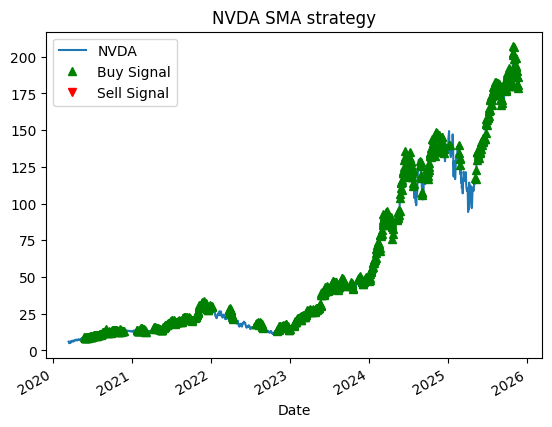

In [ ]:
plt.figure
data['Close'].plot(title= 'NVDA SMA strategy')
plt.plot(data[data['Signal']==1].index, data['Close'][data['Signal']==1], '^', color = 'g', label='Buy Signal')
plt.plot(data[data['Signal']==-1].index, data['Close'][data['Signal']==-1], 'v', color = 'r', label='Sell Signal')
plt.legend()
plt.show()


Exponential Moving Average

In [ ]:
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['Signal'] = np.where(data['EMA10'] > data['EMA50'], 1, 0)
data['Position'] = data['Signal'].diff()

In [ ]:
data['Position'].unique()

array([nan,  0.,  1., -1.])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1437 entries, 2020-03-13 to 2025-11-28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1437 non-null   float64
 1   (High, NVDA)    1437 non-null   float64
 2   (Low, NVDA)     1437 non-null   float64
 3   (Open, NVDA)    1437 non-null   float64
 4   (Volume, NVDA)  1437 non-null   int64  
 5   (MA10, )        1428 non-null   float64
 6   (MA50, )        1388 non-null   float64
 7   (Signal, )      1437 non-null   int64  
 8   (Position, )    1436 non-null   float64
 9   (EMA10, )       1437 non-null   float64
 10  (EMA50, )       1437 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 134.7 KB


/tmp/ipython-input-84945961.py:3: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data[data['Signal']==1].index, data['Close'][data['Signal']==1], '^', color = 'g', label='Buy Signal')


<Figure size 1400x700 with 0 Axes>

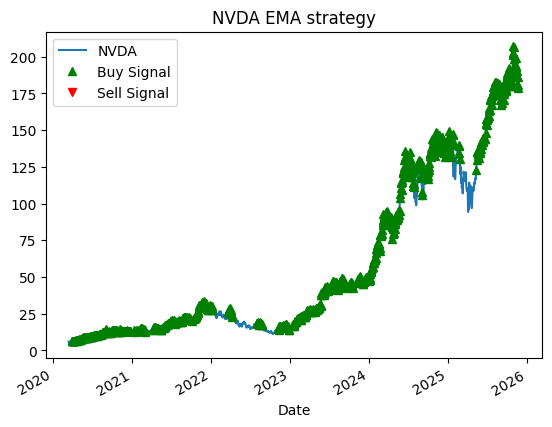

In [ ]:
plt.figure(figsize=(14,7))
data['Close'].plot(title= 'NVDA EMA strategy')
plt.plot(data[data['Signal']==1].index, data['Close'][data['Signal']==1], '^', color = 'g', label='Buy Signal')
plt.plot(data[data['Signal']==-1].index, data['Close'][data['Signal']==-1], 'v', color = 'r', label='Sell Signal')
plt.legend()
plt.show()

Testing

In [ ]:
portfolio = pd.DataFrame(index=data.index)
portfolio['Position'] = data['Position']
if 'Adj Close' not in data.columns:
    data['Adj Close'] = data['Close']
portfolio['Adj Close'] = data['Adj Close']
portfolio['Position'] = data['Position']
portfolio['Holdings'] = (data['Position'].cumsum() * data['Adj Close']).fillna(0)
initial_cash = 100000
portfolio['Cash'] = initial_cash - (data['Adj Close'] * data['Position']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']
portfolio['Returns'] = portfolio['Total'].pct_change().fillna(0)
portfolio.tail(50)

,Position,Adj Close,Holdings,Cash,Total,Returns
Date,,,,,,
2025-09-19,0.0,176.660156,176.660156,99918.801146,100095.461302,4.295539e-06
2025-09-22,0.0,183.599777,183.599777,99918.801146,100102.400923,6.933003e-05
2025-09-23,0.0,178.420059,178.420059,99918.801146,100097.221205,-5.174419e-05
2025-09-24,0.0,176.960144,176.960144,99918.801146,100095.761290,-1.458497e-05
2025-09-25,0.0,177.680115,177.680115,99918.801146,100096.481260,7.192819e-06
2025-09-26,0.0,178.180084,178.180084,99918.801146,100096.981230,4.994876e-06
2025-09-29,0.0,181.839890,181.839890,99918.801146,100100.641035,3.656259e-05
2025-09-30,0.0,186.569611,186.569611,99918.801146,100105.370756,4.724966e-05
2025-10-01,0.0,187.229584,187.229584,99918.801146,100106.030729,6.592785e-06


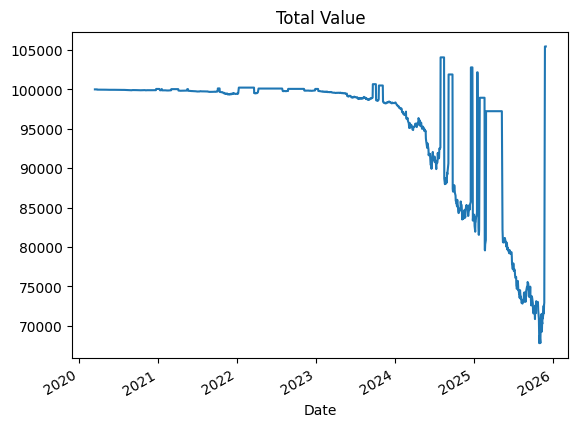

In [ ]:
initial_capital = 100000
portfolio['Cash'] = initial_capital - (portfolio['Holdings'].diff() * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

portfolio['Total'].plot(title='Total Value')
plt.show()

Comparing Models

In [ ]:
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data.head(10)

Price,Close,High,Low,Open,Volume,MA10,MA50,Signal,Position,EMA10,EMA50,Adj Close,Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,,,,
Date,,,,,,,,,,,,,
2020-03-13,5.997809,6.002292,5.469104,5.740305,634836000,NaN,NaN,0,NaN,5.997809,5.997809,5.997809,NaN
2020-03-16,4.891088,5.630728,4.831319,5.289796,726972000,NaN,NaN,0,0.0,5.796587,5.954409,4.891088,-0.184521
2020-03-17,5.410829,5.500234,4.756609,5.003404,833632000,NaN,NaN,0,0.0,5.726449,5.933092,5.410829,0.106263
2020-03-18,5.050970,5.228284,4.499602,4.983232,874268000,NaN,NaN,0,0.0,5.603635,5.898499,5.050970,-0.066507
2020-03-19,5.303744,5.397382,4.816129,5.029554,765512000,NaN,NaN,0,0.0,5.549109,5.875175,5.303744,0.050045
2020-03-20,5.123940,5.735823,5.108499,5.453913,804636000,NaN,NaN,0,0.0,5.471806,5.845715,5.123940,-0.033901
2020-03-23,5.296770,5.391155,4.943884,5.122942,643876000,NaN,NaN,0,0.0,5.439981,5.824188,5.296770,0.033730
2020-03-24,6.205505,6.292171,5.679290,5.702949,1101644000,NaN,NaN,0,0.0,5.579167,5.839141,6.205505,0.171564


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
data = yf.download('NVDA', start='2020-03-13', end='2025-11-30')
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Target'] = (data['Returns'].shift(-1) > 0).astype(int)
data.dropna(inplace=True)

X = data[['Returns', 'MA10', 'MA50']]
y = data['Target']


/tmp/ipython-input-49613746.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NVDA', start='2020-03-13', end='2025-11-30')
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head(10)

Price,Close,High,Low,Open,Volume,Returns,MA10,MA50,Target
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,
Date,,,,,,,,,
2020-05-22,8.991485,9.057978,8.679690,8.791259,1038764000,0.028603,8.417106,6.974264,0
2020-05-26,8.684173,9.146386,8.638599,9.121482,770780000,-0.034178,8.482079,7.027991,0
2020-05-27,8.492415,8.599501,7.965950,8.591781,1175892000,-0.022081,8.554076,7.100018,0
2020-05-28,8.454311,8.726757,8.346975,8.379848,734896000,-0.004487,8.624504,7.160888,1
2020-05-29,8.841313,8.841313,8.452317,8.521550,745256000,0.045776,8.708678,7.236694,0
2020-06-01,8.772332,8.806699,8.656032,8.799229,389876000,-0.007802,8.740107,7.306066,1
2020-06-02,8.791258,8.803212,8.624652,8.762370,391320000,0.002157,8.747578,7.379413,0
2020-06-03,8.735723,8.832100,8.666490,8.788270,365440000,-0.006317,8.743992,7.448192,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

rf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression()
svm = SVC()

models = [rf, log_reg, svm]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")


RandomForestClassifier Accuracy: 0.4827089337175792
LogisticRegression Accuracy: 0.5288184438040345
SVC Accuracy: 0.5288184438040345


Model Evaluation and Performance Metrics

In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

data = yf.download('NVDA', start='2020-03-13', end='2025-11-30')
data['Returns'] = data['Close'].pct_change()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Target'] = (data['Returns'].shift(-1) > 0).astype(int)
data.dropna(inplace=True)

X = data[['Returns', 'MA10', 'MA50']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

rf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression()
svm = SVC()

models = [rf, log_reg, svm]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, predictions)


    conf_matrix_df = pd.DataFrame(conf_matrix,
                                  index=['Actual: Price Down (0)', 'Actual: Price Up (1)'],
                                  columns=['Predicted: Price Down (0)', 'Predicted: Price Up (1)'])
    print(f"\nConfusion Matrix for {model.__class__.__name__}:")
    print(conf_matrix_df)

    report = classification_report(y_test, predictions, zero_division=0)
    print(f"\nClassification Report for {model.__class__.__name__}:")
    print(report)

/tmp/ipython-input-2812021579.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NVDA', start='2020-03-13', end='2025-11-30')
[*********************100%***********************]  1 of 1 completed



Confusion Matrix for RandomForestClassifier:
                        Predicted: Price Down (0)  Predicted: Price Up (1)
Actual: Price Down (0)                        118                      209
Actual: Price Up (1)                          150                      217

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40       327
           1       0.51      0.59      0.55       367

    accuracy                           0.48       694
   macro avg       0.47      0.48      0.47       694
weighted avg       0.48      0.48      0.48       694


Confusion Matrix for LogisticRegression:
                        Predicted: Price Down (0)  Predicted: Price Up (1)
Actual: Price Down (0)                          0                      327
Actual: Price Up (1)                            0                      367

Classification Report for LogisticRegression:
              precision    recall  f1

Simple Visualization

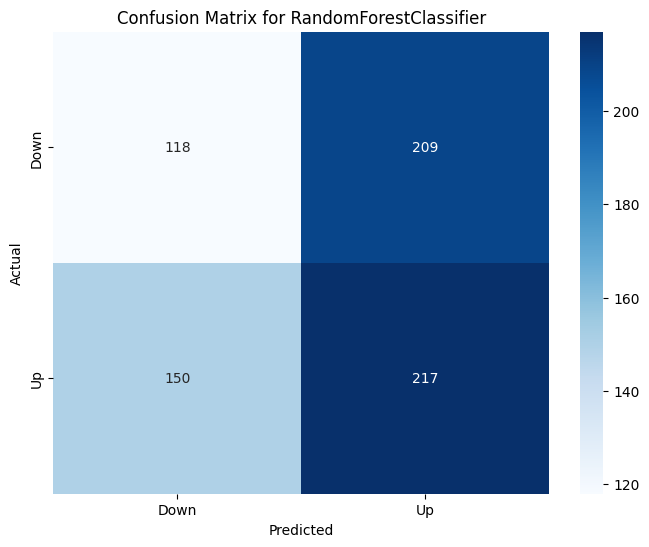

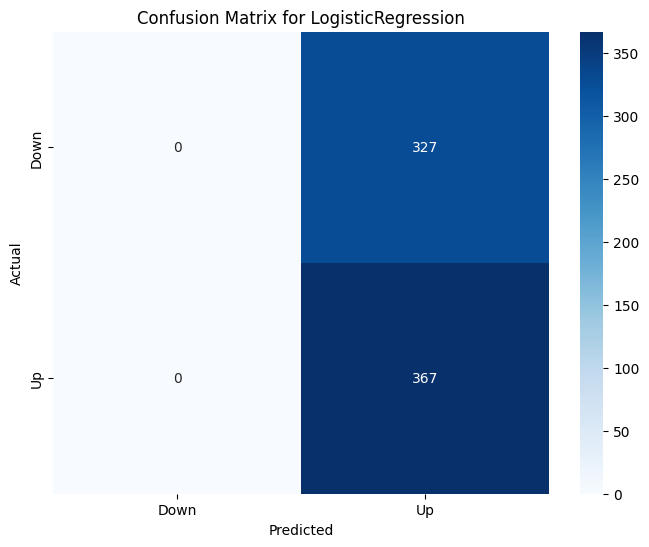

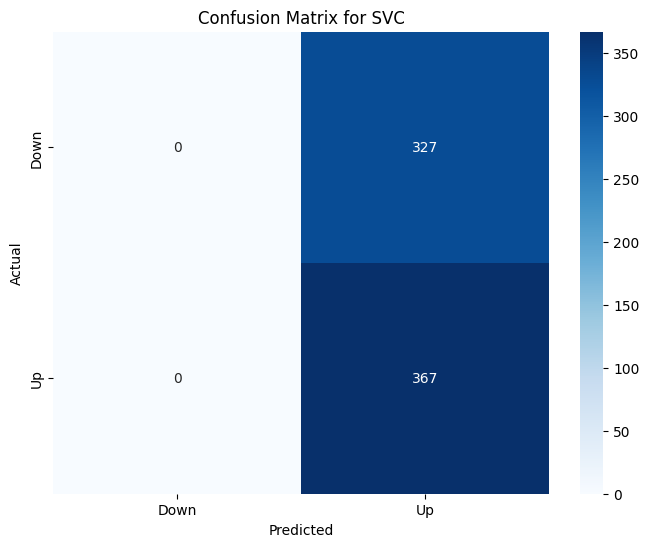

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for model in models:
    predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Capital asset pricing model

In [ ]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

In [ ]:
tickers = ['TSLA', 'MSFT', 'GS', '^GSPC', 'NVDA']
data = yf.download(tickers, period='1y', interval='1d')['Close']

data = data.rename(columns={'^GSPC': 'SP500'})

/tmp/ipython-input-1560940693.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='1y', interval='1d')['Close']
[*********************100%***********************]  5 of 5 completed


In [ ]:
returns = data.pct_change().dropna()
returns.head(10)

Ticker,GS,MSFT,NVDA,TSLA,SP500
Date,,,,,
2025-01-02,0.004104,-0.006928,0.029935,-0.060816,-0.002224
2025-01-03,0.008975,0.011396,0.044538,0.082156,0.012596
2025-01-06,0.005619,0.010630,0.034332,0.001486,0.005538
2025-01-07,-0.005605,-0.012808,-0.062170,-0.040603,-0.011104
2025-01-08,-0.000172,0.005185,-0.000214,0.001471,0.001560
2025-01-10,-0.034516,-0.013214,-0.029976,-0.000506,-0.015412
2025-01-13,0.005268,-0.004201,-0.019719,0.021711,0.001575
2025-01-14,0.015241,-0.003643,-0.011034,-0.017232,0.001146
2025-01-15,0.060172,0.025597,0.034001,0.080382,0.018313


In [ ]:
rf_annual = 0.04
rf_daily = (1+rf.annual)**(1/365) - 1
returns['RF'] = rf_daily

In [ ]:
excess = pd.DataFrame({
    'SP500_exc': returns['SP500'] - returns['RF'],
})
for stock in ['TSLA','MSFT','GS', 'NVDA']:
    excess[f'{stock}_exc'] = returns[stock] - returns['RF']

excess.head(10)

,SP500_exc,TSLA_exc,MSFT_exc,GS_exc,NVDA_exc
Date,,,,,
2025-01-02,-0.002331,-0.060924,-0.007035,0.003996,0.029828
2025-01-03,0.012489,0.082048,0.011288,0.008867,0.044430
2025-01-06,0.005431,0.001379,0.010522,0.005512,0.034225
2025-01-07,-0.011211,-0.040711,-0.012916,-0.005713,-0.062277
2025-01-08,0.001453,0.001363,0.005078,-0.000280,-0.000321
2025-01-10,-0.015519,-0.000614,-0.013321,-0.034624,-0.030084
2025-01-13,0.001468,0.021603,-0.004308,0.005160,-0.019826
2025-01-14,0.001039,-0.017340,-0.003751,0.015134,-0.011141
2025-01-15,0.018205,0.080274,0.025490,0.060064,0.033894


In [ ]:
def run_capm(y_exc, x_exc):

    X = sm.add_constant(x_exc)
    model = sm.OLS(y_exc, X).fit()
    return model

In [ ]:
results = {}

for stock in ['TSLA','MSFT','GS', 'NVDA']:
    y_exc = excess[f'{stock}_exc']
    x_exc = excess['SP500_exc']
    model = run_capm(y_exc, x_exc)
    results[stock] = {
        'alpha': model.params['const'],
        'beta' : model.params['SP500_exc'],
        'R2'   : model.rsquared,
    }

pd.DataFrame(results).T.rename_axis('Ticker').round(4)

,alpha,beta,R2
Ticker,,,
TSLA,-0.0002,2.3434,0.4784
MSFT,0.0001,0.9111,0.4957
GS,0.0011,1.3849,0.6925
NVDA,0.0005,1.9610,0.5484


Plotting Efficient Frontier

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
tickers = ["NVDA", "GOOGL", "MSFT", "TSLA","^GSPC"]
start_date = "2023-11-30"
end_date   = "2025-11-30"

In [ ]:
raw_data = yf.download(tickers, start=start_date, end=end_date, progress=True)

/tmp/ipython-input-1787448472.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers, start=start_date, end=end_date, progress=True)
[*********************100%***********************]  5 of 5 completed


In [ ]:
prices = raw_data['Close'].copy()

In [ ]:
print(prices.head(10))

Ticker           GOOGL        MSFT       NVDA        TSLA        ^GSPC
Date                                                                  
2023-11-30  131.536148  373.343475  46.739845  240.080002  4567.799805
2023-12-01  130.871185  369.008148  46.734852  238.830002  4594.629883
2023-12-04  128.300583  363.717072  45.480659  235.580002  4569.779785
2023-12-05  130.007721  367.047394  46.540077  238.720001  4567.180176
2023-12-06  129.044983  363.382019  45.477665  239.369995  4549.339844
2023-12-07  135.903137  365.500458  46.570053  242.639999  4585.589844
2023-12-08  133.977707  368.732269  47.479549  243.839996  4604.370117
2023-12-11  132.290466  365.845306  46.601040  239.740005  4622.439941
2023-12-12  131.526199  368.880066  47.630466  237.009995  4643.700195
2023-12-13  131.575882  368.870239  48.061230  239.289993  4707.089844


In [ ]:
returns = prices.pct_change().dropna()

In [ ]:
mean_daily_returns = returns.mean()
mean_daily_returns

,0
Ticker,
GOOGL,0.001961
MSFT,0.000649
NVDA,0.003182
TSLA,0.001953
^GSPC,0.000861


In [ ]:
cov_matrix_daily = returns.cov()
print(cov_matrix_daily)

Ticker     GOOGL      MSFT      NVDA      TSLA     ^GSPC
Ticker                                                  
GOOGL   0.000366  0.000133  0.000246  0.000306  0.000113
MSFT    0.000133  0.000194  0.000249  0.000222  0.000102
NVDA    0.000246  0.000249  0.001036  0.000476  0.000221
TSLA    0.000306  0.000222  0.000476  0.001597  0.000240
^GSPC   0.000113  0.000102  0.000221  0.000240  0.000102


In [ ]:
corr_matrix_daily = returns.corr()
print(corr_matrix_daily)

Ticker     GOOGL      MSFT      NVDA      TSLA     ^GSPC
Ticker                                                  
GOOGL   1.000000  0.498799  0.399235  0.400653  0.585642
MSFT    0.498799  1.000000  0.555681  0.399400  0.722429
NVDA    0.399235  0.555681  1.000000  0.370428  0.682137
TSLA    0.400653  0.399400  0.370428  1.000000  0.595240
^GSPC   0.585642  0.722429  0.682137  0.595240  1.000000


In [ ]:
trading_days = 252
mean_annual_returns = mean_daily_returns*trading_days
print(mean_annual_returns)
cov_matrix_annual = cov_matrix_daily * trading_days
print(cov_matrix_annual)


volatility_annual = returns.std() * np.sqrt(trading_days)

Ticker
GOOGL    0.494216
MSFT     0.163453
NVDA     0.801845
TSLA     0.492080
^GSPC    0.216981
dtype: float64
Ticker     GOOGL      MSFT      NVDA      TSLA     ^GSPC
Ticker                                                  
GOOGL   0.092206  0.033510  0.061948  0.077173  0.028474
MSFT    0.033510  0.048948  0.062822  0.056053  0.025592
NVDA    0.061948  0.062822  0.261115  0.120072  0.055811
TSLA    0.077173  0.056053  0.120072  0.402384  0.060457
^GSPC   0.028474  0.025592  0.055811  0.060457  0.025637


CAPM REGRESSION

In [ ]:
import statsmodels.api as sm

market_ret = returns["^GSPC"]
stock_rets = returns.drop(columns="^GSPC")

alphas = {}
betas  = {}
for ticker in stock_rets.columns:
    y = stock_rets[ticker]
    X = sm.add_constant(market_ret)
    model = sm.OLS(y, X).fit()
    alphas[ticker] = model.params["const"]
    betas[ticker]  = model.params["^GSPC"]


import pandas as pd

regression_table = pd.DataFrame({
    "Alpha (daily)" : alphas,
    "Beta"          : betas
})

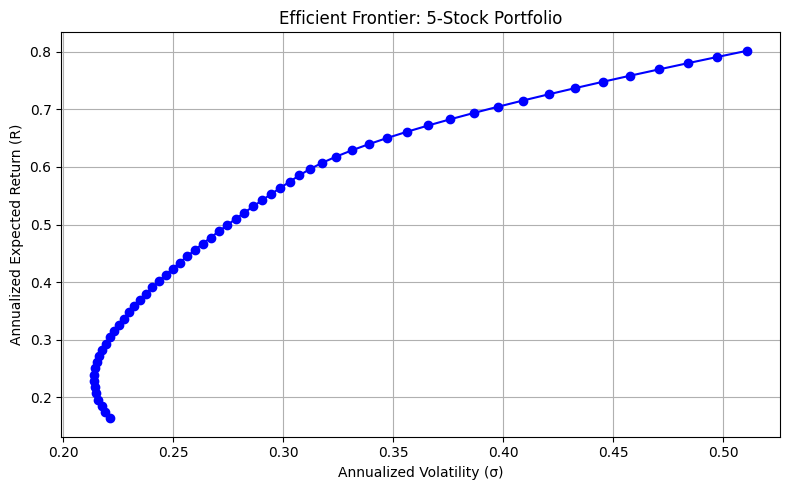

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def efficient_frontier(mu, Sigma, n_points=100):
    """
    mu : array of expected returns of the stocks
    Sigma : covariance matrix of the stocks
    Compute a long-only efficient frontier:
      - minimize portfolio volatility σ = sqrt(wᵀ Σ w)
      - subject to: sum(w) = 1, wᵀ mu = R_target, and 0 ≤ w_i ≤ 1
    Returns:
      vols      : array of volatilities (σ) along the frontier
      rets      : matching target returns (R_target)
      weights   : list of optimal weight vectors for each point
    """
    n = len(mu)
    vols, rets, weights = [], [], []


    R_targets = np.linspace(mu.min(), mu.max(), n_points)

    for R in R_targets:

        objective = lambda w: np.sqrt(w @ Sigma @ w)

        cons = (
            {"type": "eq", "fun": lambda w: np.sum(w) - 1.0},
            {"type": "eq", "fun": lambda w: w @ mu - R}
        )

        bounds = [(0.0, 1.0)] * n

        w0 = np.repeat(1/n, n)

        result = minimize(objective, w0, bounds=bounds, constraints=cons)
        if result.success:
            vols.append(result.fun)
            rets.append(R)
            weights.append(result.x)

    return np.array(vols), np.array(rets), weights



trading_days = 252
mu_annual    = returns.mean() * trading_days
Sigma_annual = returns.cov() * trading_days

tickers   = ["NVDA", "GOOGL", "TSLA", "MSFT"]
mu_vec    = mu_annual.loc[tickers].values
Sigma_sub = Sigma_annual.loc[tickers, tickers].values



vols5, rets5, weights5 = efficient_frontier(mu_vec, Sigma_sub, n_points=60)


plt.figure(figsize=(8, 5))
plt.plot(vols5, rets5, marker='o', linestyle='-', color='blue')
plt.title("Efficient Frontier: 5-Stock Portfolio")
plt.xlabel("Annualized Volatility (σ)")
plt.ylabel("Annualized Expected Return (R)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
idx_min = np.argmin(vols5)

min_risk_weights = weights5[idx_min]

print("Lowest risk (σ):", vols5[idx_min])
print("Expected return at lowest risk (R):", rets5[idx_min])

for i, ticker in enumerate(tickers):
    weight = min_risk_weights[i]
    print(f"{ticker}: {weight:.3%}")

Lowest risk (σ): 0.21387764661252404
Expected return at lowest risk (R): 0.2283739099768777
NVDA: 0.000%
GOOGL: 19.628%
TSLA: 0.000%
MSFT: 80.372%


LONG ONLY MEAN REVERSION STRATEGY

In [ ]:
import datetime
import yfinance as yf
import pandas as pd

initial_capital = 10_000.00
ticker          = "NVDA"
end_date        = "2025-11-30"
start_date      = "2024-11-30"

data   = yf.download(ticker, start=start_date, end=end_date, progress=False)
prices = data["Close"].dropna()
prices

/tmp/ipython-input-2652904697.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data   = yf.download(ticker, start=start_date, end=end_date, progress=False)


Ticker,NVDA
Date,
2024-12-02,138.582550
2024-12-03,140.211990
2024-12-04,145.090332
2024-12-05,145.020340
2024-12-06,142.401062
...,...
2025-11-21,178.870041
2025-11-24,182.539841
2025-11-25,177.810104


In [ ]:
# In this code block we will compute the RSI signals and make a decision whether to go long or to stay flat.

# One thing to note here is, for simplification, we assume that we are purchasing fractional shares. That is if we have to go long, we invest all the capital that we have.

import numpy as np
import pandas as pd

# If `prices` is a DataFrame (multi-column), extract the NVDA series
if isinstance(prices, pd.DataFrame):
    prices = prices["NVDA"]

# 1. Calculate daily price changes
delta = prices.diff()

''' 2. Separate gains and losses. This will create two different columns gain and loss, where column gain will only contain positive price changes
and the negative price changes will be 0. The same would apply loss column.'''
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# 3. Now we calculate average gain/loss over a period of 14 days. Feel free to tweak the value of N to observe different amount of profits.
N = 14
avg_gain = gain.rolling(window=N).mean()
avg_loss = loss.rolling(window=N).mean()

# 4. Compute RS and RSI
rs  = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

''' 5. Now, based on the rsi values of each row, we decide whether to buy or sell a stock.
 1 -> Buy
 -1 -> Sell
 0 -> Do nothing
 As a starting point, we use the conventional rule that says if the RSI < 30 we buy and if RSI > 70 we sell a stock. '''
signal = pd.Series(0, index=prices.index, dtype=int)
signal.loc[rsi < 30] = 1
signal.loc[rsi > 70] = -1

# 6. Convert actions into daily positions:
# Here, since we are only considering long only trading strategy, we change the selling signals to 0.
positions = signal.replace(-1, 0)

# If any row is NaN, carry forward the last position
positions = positions.ffill()

# avoid look-ahead bias: shift signals so trades execute at the next day’s price
positions = positions.shift(1).fillna(0)

In [ ]:
#  Backtest our trading strategy.

# 1. Compute daily simple returns
returns = prices.pct_change().fillna(0)

# 2. Strategy returns: If we are taking a long position it returns some value, else it returns 0 because we are not taking any position
strat_rets   = positions * returns

# 3. Update your capital each day by applying that day’s return
equity_curve = initial_capital * (1 + strat_rets).cumprod()

In [ ]:
# ─── Block 4: Performance Summary ───

final_amount = equity_curve.iloc[-1]
net_profit   = final_amount - initial_capital

print(f"Initial Capital : ${initial_capital:,.2f}")
print(f"Final Amount    : ${final_amount:,.2f}")
print(f"Net Profit      : ${net_profit:,.2f}")



Initial Capital : $10,000.00
Final Amount    : $12,255.45
Net Profit      : $2,255.45
